In [1]:
import pandas as pd
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
# Load the top 30 features for each age group
top_30_features = pd.read_csv('top_30_features_all_age_group.csv', index_col=0).to_dict(orient='list')

# Ensure the age group keys are strings
top_30_features = {str(key): value for key, value in top_30_features.items()}
def split_data_by_age_cv(df, age_column='age', n_splits=5, random_state=42):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    age_groups = df.groupby(df[age_column] // 10 * 10)
    
    fold_data = []

    for train_index, test_index in kf.split(df):
        train_list = []
        test_list = []
        
        for _, group in age_groups:
            group_train_index = [idx for idx in train_index if idx in group.index]
            group_test_index = [idx for idx in test_index if idx in group.index]
            
            train = group.loc[group_train_index]
            test = group.loc[group_test_index]
            
            train_list.append(train)
            test_list.append(test)
        
        train_df = pd.concat(train_list, ignore_index=True)
        test_df = pd.concat(test_list, ignore_index=True)
        
        fold_data.append((train_df, test_df))
    
    return fold_data

# Example usage
imputed_data = pd.read_csv('imputed_data.csv',index_col =0)  # Replace with your actual data
fold_data = split_data_by_age_cv(imputed_data)

# Plotting the age distribution for the first fold's train and test sets
class geodata:
    def __init__(self, dnam, metadata):
        self.dnam = dnam
        self.metadata = metadata
def transform_to_biolearn_style(train_data, test_data, age_column='age'):
    X_train = train_data.drop(columns=[age_column]).transpose()
    y_train = train_data[age_column]
    
    X_test = test_data.drop(columns=[age_column]).transpose()
    y_test = test_data[age_column]
    
    train_geo = geodata(dnam=X_train, metadata={'age': y_train})
    test_geo = geodata(dnam=X_test, metadata={'age': y_test})

    
    return train_geo, test_geo



In [2]:
train_data, test_data = fold_data[0]

Horvath - MAE: 13.312805634073706, MedAE: 12.809462619572404, RMSE: 15.499974445913258
Hannum - MAE: 6.578934623904434, MedAE: 5.829276766761531, RMSE: 7.92913063673558
PhenoAge - MAE: 15.979300106390946, MedAE: 13.90557851694, RMSE: 19.048922715935152
Lin - MAE: 9.16594223479062, MedAE: 7.260567421689199, RMSE: 11.863792745066519
YingCausAge - MAE: 18.156719902861422, MedAE: 16.712199437415013, RMSE: 21.034714588288015
YingDamAge - MAE: 29.854703755562074, MedAE: 32.25115188936543, RMSE: 34.38837290248907
YingAdaptAge - MAE: 27.9032939756812, MedAE: 24.504023375772533, RMSE: 32.97808329776758
Horvathv2 - MAE: 6.9739384312194375, MedAE: 6.780804680665952, RMSE: 8.471954735258855
PEDBE - MAE: 32.47550868413378, MedAE: 34.726456945327236, RMSE: 36.9800296419093
DunedinPoAm38 - MAE: 41.887127111538824, MedAE: 45.13349168781272, RMSE: 46.764083208043594
HRSInCHPhenoAge - MAE: 9.856652147956428, MedAE: 8.52677892146039, RMSE: 11.818060914703707


,MAE,MedAE,RMSE
Hannum,6.578935,5.829277,7.929131
Horvathv2,6.973938,6.780805,8.471955
Lin,9.165942,7.260567,11.863793
HRSInCHPhenoAge,9.856652,8.526779,11.818061
Horvath,13.312806,12.809463,15.499974
PhenoAge,15.979300,13.905579,19.048923
YingCausAge,18.156720,16.712199,21.034715
YingAdaptAge,27.903294,24.504023,32.978083
YingDamAge,29.854704,32.251152,34.388373
PEDBE,32.475509,34.726457,36.980030


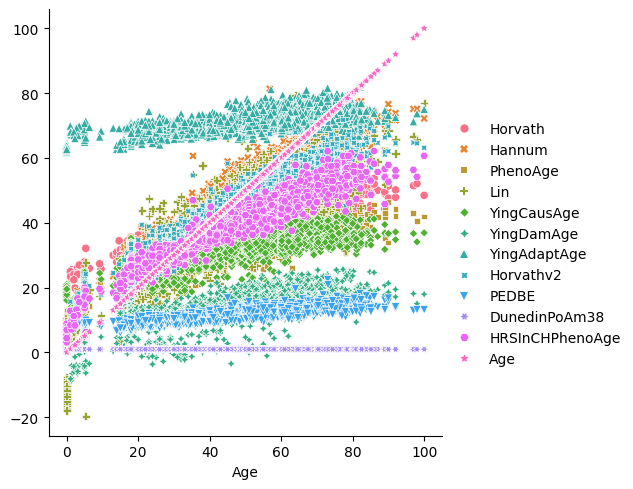

In [3]:
train_geo, test_geo = transform_to_biolearn_style(train_data, test_data)

data = test_geo
from biolearn.model_gallery import ModelGallery
gallery = ModelGallery()
#Note that by default clocks will impute missing data.
#To change this behavior set the imputation= parameter when getting the clock
horvath_results = gallery.get("Horvathv1").predict(data)
hannum_results = gallery.get("Hannum").predict(data)
phenoage_results = gallery.get("PhenoAge").predict(data)
Lin_results = gallery.get("Lin").predict(data)
YingCausAge_results = gallery.get("YingCausAge").predict(data)
YingDamAge_results = gallery.get("YingDamAge").predict(data)
YingAdaptAge_results = gallery.get("YingAdaptAge").predict(data)
Horvathv2_results = gallery.get("Horvathv2").predict(data)
HRSInCHPhenoAge_results = gallery.get("HRSInCHPhenoAge").predict(data)
DunedinPoAm38_results = gallery.get("DunedinPoAm38").predict(data)
PEDBE_results = gallery.get("PEDBE").predict(data)
import seaborn as sn
import pandas as pd

actual_age = data.metadata['age']
plot_data = pd.DataFrame({
    'Horvath': horvath_results['Predicted'],
    'Hannum': hannum_results['Predicted'],
    'PhenoAge': phenoage_results['Predicted'],
    'Lin': Lin_results['Predicted'],
    "YingCausAge":YingCausAge_results['Predicted'],
    "YingDamAge":YingDamAge_results['Predicted'],
    "YingAdaptAge":YingAdaptAge_results['Predicted'],
    "Horvathv2":Horvathv2_results['Predicted'],
    "PEDBE":PEDBE_results['Predicted'],
    #"DunedinPACE" :DunedinPACE_results['Predicted'],
    "DunedinPoAm38":DunedinPoAm38_results['Predicted'],
    'HRSInCHPhenoAge':HRSInCHPhenoAge_results['Predicted'],
    "Age": actual_age
})
plot_data.index=plot_data['Age']

sn.relplot(data=plot_data, kind="scatter");

import seaborn as sns
import pandas as pd
from sklearn.metrics import mean_absolute_error, median_absolute_error, mean_squared_error
import numpy as np

def calculate_errors(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    medae = median_absolute_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    return mae, medae, rmse

actual_age = data.metadata['age']
predictions = {
    'Horvath': horvath_results['Predicted'],
    'Hannum': hannum_results['Predicted'],
    'PhenoAge': phenoage_results['Predicted'],
    'Lin': Lin_results['Predicted'],
    'YingCausAge': YingCausAge_results['Predicted'],
    'YingDamAge': YingDamAge_results['Predicted'],
    'YingAdaptAge': YingAdaptAge_results['Predicted'],
    'Horvathv2': Horvathv2_results['Predicted'],
    'PEDBE': PEDBE_results['Predicted'],
    'DunedinPoAm38': DunedinPoAm38_results['Predicted'],
    'HRSInCHPhenoAge': HRSInCHPhenoAge_results['Predicted']
}

# Calculate error metrics for each prediction set
error_metrics = {}
for name, pred in predictions.items():
    mae, medae, rmse = calculate_errors(actual_age, pred)
    error_metrics[name] = {
        'MAE': mae,
        'MedAE': medae,
        'RMSE': rmse
    }




# Print error metrics
for name, metrics in error_metrics.items():
    print(f"{name} - MAE: {metrics['MAE']}, MedAE: {metrics['MedAE']}, RMSE: {metrics['RMSE']}")
error_metrics_df = pd.DataFrame(error_metrics).T
error_metrics_df =error_metrics_df.sort_values(by='MAE', ascending=True)
error_metrics_df

In [2]:
train_data, test_data = fold_data[1]

Horvath - MAE: 13.38182297034586, MedAE: 12.874863746132409, RMSE: 15.52167965770804
Hannum - MAE: 6.842065711523879, MedAE: 6.335655457274294, RMSE: 8.156490239811946
PhenoAge - MAE: 15.706173739754698, MedAE: 13.372555312169997, RMSE: 18.874951546697613
Lin - MAE: 9.185714554409454, MedAE: 7.03279337635, RMSE: 11.959464140907578
YingCausAge - MAE: 17.88549066385656, MedAE: 16.140399207655964, RMSE: 20.783226821140037
YingDamAge - MAE: 29.096304374449087, MedAE: 31.45952820280686, RMSE: 33.81104787967781
YingAdaptAge - MAE: 28.40557502182023, MedAE: 24.66694032554046, RMSE: 33.439009413975974
Horvathv2 - MAE: 7.075054287922473, MedAE: 6.849683318231868, RMSE: 8.489669319435112
PEDBE - MAE: 31.886536007681883, MedAE: 34.41358673757563, RMSE: 36.547307044540744
DunedinPoAm38 - MAE: 41.24246838646667, MedAE: 44.74299168781272, RMSE: 46.21961426530822
HRSInCHPhenoAge - MAE: 9.765522739883568, MedAE: 8.430397097372946, RMSE: 11.641306362253554


,MAE,MedAE,RMSE
Hannum,6.842066,6.335655,8.156490
Horvathv2,7.075054,6.849683,8.489669
Lin,9.185715,7.032793,11.959464
HRSInCHPhenoAge,9.765523,8.430397,11.641306
Horvath,13.381823,12.874864,15.521680
PhenoAge,15.706174,13.372555,18.874952
YingCausAge,17.885491,16.140399,20.783227
YingAdaptAge,28.405575,24.666940,33.439009
YingDamAge,29.096304,31.459528,33.811048
PEDBE,31.886536,34.413587,36.547307


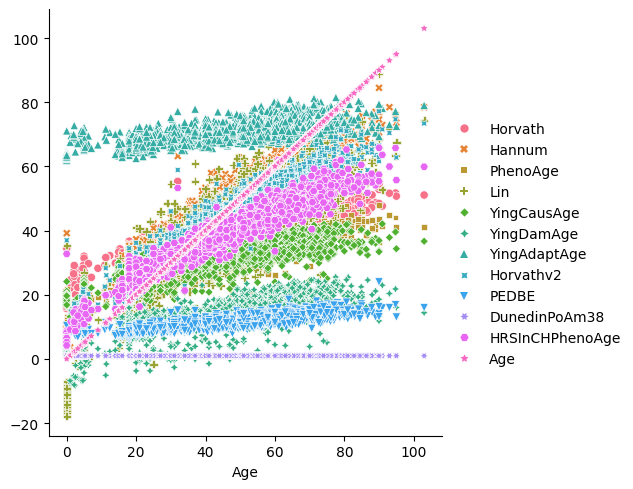

In [3]:
train_geo, test_geo = transform_to_biolearn_style(train_data, test_data)

data = test_geo
from biolearn.model_gallery import ModelGallery
gallery = ModelGallery()
#Note that by default clocks will impute missing data.
#To change this behavior set the imputation= parameter when getting the clock
horvath_results = gallery.get("Horvathv1").predict(data)
hannum_results = gallery.get("Hannum").predict(data)
phenoage_results = gallery.get("PhenoAge").predict(data)
Lin_results = gallery.get("Lin").predict(data)
YingCausAge_results = gallery.get("YingCausAge").predict(data)
YingDamAge_results = gallery.get("YingDamAge").predict(data)
YingAdaptAge_results = gallery.get("YingAdaptAge").predict(data)
Horvathv2_results = gallery.get("Horvathv2").predict(data)
HRSInCHPhenoAge_results = gallery.get("HRSInCHPhenoAge").predict(data)
DunedinPoAm38_results = gallery.get("DunedinPoAm38").predict(data)
PEDBE_results = gallery.get("PEDBE").predict(data)
import seaborn as sn
import pandas as pd

actual_age = data.metadata['age']
plot_data = pd.DataFrame({
    'Horvath': horvath_results['Predicted'],
    'Hannum': hannum_results['Predicted'],
    'PhenoAge': phenoage_results['Predicted'],
    'Lin': Lin_results['Predicted'],
    "YingCausAge":YingCausAge_results['Predicted'],
    "YingDamAge":YingDamAge_results['Predicted'],
    "YingAdaptAge":YingAdaptAge_results['Predicted'],
    "Horvathv2":Horvathv2_results['Predicted'],
    "PEDBE":PEDBE_results['Predicted'],
    #"DunedinPACE" :DunedinPACE_results['Predicted'],
    "DunedinPoAm38":DunedinPoAm38_results['Predicted'],
    'HRSInCHPhenoAge':HRSInCHPhenoAge_results['Predicted'],
    "Age": actual_age
})
plot_data.index=plot_data['Age']

sn.relplot(data=plot_data, kind="scatter");

import seaborn as sns
import pandas as pd
from sklearn.metrics import mean_absolute_error, median_absolute_error, mean_squared_error
import numpy as np

def calculate_errors(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    medae = median_absolute_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    return mae, medae, rmse

actual_age = data.metadata['age']
predictions = {
    'Horvath': horvath_results['Predicted'],
    'Hannum': hannum_results['Predicted'],
    'PhenoAge': phenoage_results['Predicted'],
    'Lin': Lin_results['Predicted'],
    'YingCausAge': YingCausAge_results['Predicted'],
    'YingDamAge': YingDamAge_results['Predicted'],
    'YingAdaptAge': YingAdaptAge_results['Predicted'],
    'Horvathv2': Horvathv2_results['Predicted'],
    'PEDBE': PEDBE_results['Predicted'],
    'DunedinPoAm38': DunedinPoAm38_results['Predicted'],
    'HRSInCHPhenoAge': HRSInCHPhenoAge_results['Predicted']
}

# Calculate error metrics for each prediction set
error_metrics = {}
for name, pred in predictions.items():
    mae, medae, rmse = calculate_errors(actual_age, pred)
    error_metrics[name] = {
        'MAE': mae,
        'MedAE': medae,
        'RMSE': rmse
    }




# Print error metrics
for name, metrics in error_metrics.items():
    print(f"{name} - MAE: {metrics['MAE']}, MedAE: {metrics['MedAE']}, RMSE: {metrics['RMSE']}")
error_metrics_df = pd.DataFrame(error_metrics).T
error_metrics_df =error_metrics_df.sort_values(by='MAE', ascending=True)
error_metrics_df

In [4]:
train_data, test_data = fold_data[2]

Horvath - MAE: 13.176409118821791, MedAE: 12.714470279034906, RMSE: 15.256842309727816
Hannum - MAE: 6.539969409443089, MedAE: 5.9566188427257245, RMSE: 7.833229928963778
PhenoAge - MAE: 15.707787992942587, MedAE: 13.999293770097985, RMSE: 18.734394387595113
Lin - MAE: 8.991678187593392, MedAE: 7.1504944976, RMSE: 11.58766682587721
YingCausAge - MAE: 17.904706924491425, MedAE: 16.520444805979857, RMSE: 20.701618081939728
YingDamAge - MAE: 29.362356507880783, MedAE: 32.29289623400584, RMSE: 33.88014726195594
YingAdaptAge - MAE: 28.060430552546414, MedAE: 24.20985878695148, RMSE: 33.03285036864511
Horvathv2 - MAE: 6.7850931010885995, MedAE: 6.76670487038168, RMSE: 8.180185699046572
PEDBE - MAE: 32.217562101203335, MedAE: 34.86421112903868, RMSE: 36.682139924144444
DunedinPoAm38 - MAE: 41.60670434359225, MedAE: 45.03949168781272, RMSE: 46.43566560150737
HRSInCHPhenoAge - MAE: 9.65056595031681, MedAE: 8.380045820185941, RMSE: 11.475758153548497


,MAE,MedAE,RMSE
Hannum,6.539969,5.956619,7.833230
Horvathv2,6.785093,6.766705,8.180186
Lin,8.991678,7.150494,11.587667
HRSInCHPhenoAge,9.650566,8.380046,11.475758
Horvath,13.176409,12.714470,15.256842
PhenoAge,15.707788,13.999294,18.734394
YingCausAge,17.904707,16.520445,20.701618
YingAdaptAge,28.060431,24.209859,33.032850
YingDamAge,29.362357,32.292896,33.880147
PEDBE,32.217562,34.864211,36.682140


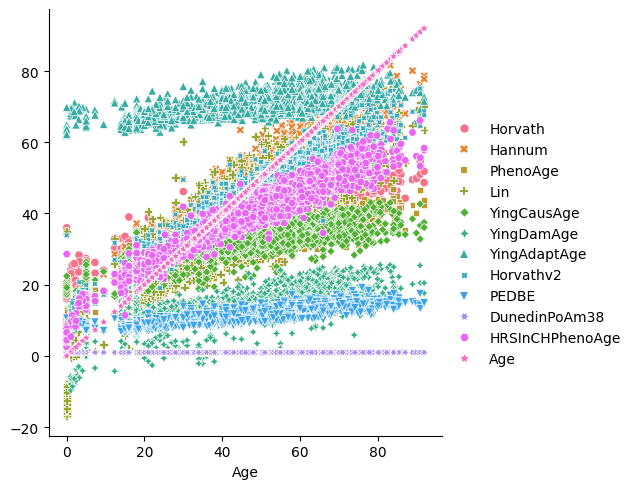

In [5]:
train_geo, test_geo = transform_to_biolearn_style(train_data, test_data)

data = test_geo
from biolearn.model_gallery import ModelGallery
gallery = ModelGallery()
#Note that by default clocks will impute missing data.
#To change this behavior set the imputation= parameter when getting the clock
horvath_results = gallery.get("Horvathv1").predict(data)
hannum_results = gallery.get("Hannum").predict(data)
phenoage_results = gallery.get("PhenoAge").predict(data)
Lin_results = gallery.get("Lin").predict(data)
YingCausAge_results = gallery.get("YingCausAge").predict(data)
YingDamAge_results = gallery.get("YingDamAge").predict(data)
YingAdaptAge_results = gallery.get("YingAdaptAge").predict(data)
Horvathv2_results = gallery.get("Horvathv2").predict(data)
HRSInCHPhenoAge_results = gallery.get("HRSInCHPhenoAge").predict(data)
DunedinPoAm38_results = gallery.get("DunedinPoAm38").predict(data)
PEDBE_results = gallery.get("PEDBE").predict(data)
import seaborn as sn
import pandas as pd

actual_age = data.metadata['age']
plot_data = pd.DataFrame({
    'Horvath': horvath_results['Predicted'],
    'Hannum': hannum_results['Predicted'],
    'PhenoAge': phenoage_results['Predicted'],
    'Lin': Lin_results['Predicted'],
    "YingCausAge":YingCausAge_results['Predicted'],
    "YingDamAge":YingDamAge_results['Predicted'],
    "YingAdaptAge":YingAdaptAge_results['Predicted'],
    "Horvathv2":Horvathv2_results['Predicted'],
    "PEDBE":PEDBE_results['Predicted'],
    #"DunedinPACE" :DunedinPACE_results['Predicted'],
    "DunedinPoAm38":DunedinPoAm38_results['Predicted'],
    'HRSInCHPhenoAge':HRSInCHPhenoAge_results['Predicted'],
    "Age": actual_age
})
plot_data.index=plot_data['Age']

sn.relplot(data=plot_data, kind="scatter");

import seaborn as sns
import pandas as pd
from sklearn.metrics import mean_absolute_error, median_absolute_error, mean_squared_error
import numpy as np

def calculate_errors(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    medae = median_absolute_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    return mae, medae, rmse

actual_age = data.metadata['age']
predictions = {
    'Horvath': horvath_results['Predicted'],
    'Hannum': hannum_results['Predicted'],
    'PhenoAge': phenoage_results['Predicted'],
    'Lin': Lin_results['Predicted'],
    'YingCausAge': YingCausAge_results['Predicted'],
    'YingDamAge': YingDamAge_results['Predicted'],
    'YingAdaptAge': YingAdaptAge_results['Predicted'],
    'Horvathv2': Horvathv2_results['Predicted'],
    'PEDBE': PEDBE_results['Predicted'],
    'DunedinPoAm38': DunedinPoAm38_results['Predicted'],
    'HRSInCHPhenoAge': HRSInCHPhenoAge_results['Predicted']
}

# Calculate error metrics for each prediction set
error_metrics = {}
for name, pred in predictions.items():
    mae, medae, rmse = calculate_errors(actual_age, pred)
    error_metrics[name] = {
        'MAE': mae,
        'MedAE': medae,
        'RMSE': rmse
    }




# Print error metrics
for name, metrics in error_metrics.items():
    print(f"{name} - MAE: {metrics['MAE']}, MedAE: {metrics['MedAE']}, RMSE: {metrics['RMSE']}")
error_metrics_df = pd.DataFrame(error_metrics).T
error_metrics_df =error_metrics_df.sort_values(by='MAE', ascending=True)
error_metrics_df

In [6]:
train_data, test_data = fold_data[3]

Horvath - MAE: 13.214822825328561, MedAE: 12.725904814020904, RMSE: 15.400005338956317
Hannum - MAE: 6.532664154463334, MedAE: 6.095603699999995, RMSE: 7.824667080399056
PhenoAge - MAE: 15.934532758039426, MedAE: 14.336526479317993, RMSE: 19.026003534320257
Lin - MAE: 9.168073276592972, MedAE: 7.081995290899997, RMSE: 11.81518857817798
YingCausAge - MAE: 18.063188840166827, MedAE: 17.00777817737336, RMSE: 20.944702259644114
YingDamAge - MAE: 30.08995735015531, MedAE: 32.74906715929052, RMSE: 34.397317618807286
YingAdaptAge - MAE: 27.511306770759482, MedAE: 23.646142377529518, RMSE: 32.46939975532163
Horvathv2 - MAE: 6.90182378354122, MedAE: 6.604154196835497, RMSE: 8.397162561122883
PEDBE - MAE: 32.78447179510547, MedAE: 35.349927089127796, RMSE: 37.12545333636232
DunedinPoAm38 - MAE: 42.29061149462342, MedAE: 46.023991687812725, RMSE: 46.947156203472304
HRSInCHPhenoAge - MAE: 9.798197721957564, MedAE: 8.55095215672743, RMSE: 11.732177852895424


,MAE,MedAE,RMSE
Hannum,6.532664,6.095604,7.824667
Horvathv2,6.901824,6.604154,8.397163
Lin,9.168073,7.081995,11.815189
HRSInCHPhenoAge,9.798198,8.550952,11.732178
Horvath,13.214823,12.725905,15.400005
PhenoAge,15.934533,14.336526,19.026004
YingCausAge,18.063189,17.007778,20.944702
YingAdaptAge,27.511307,23.646142,32.469400
YingDamAge,30.089957,32.749067,34.397318
PEDBE,32.784472,35.349927,37.125453


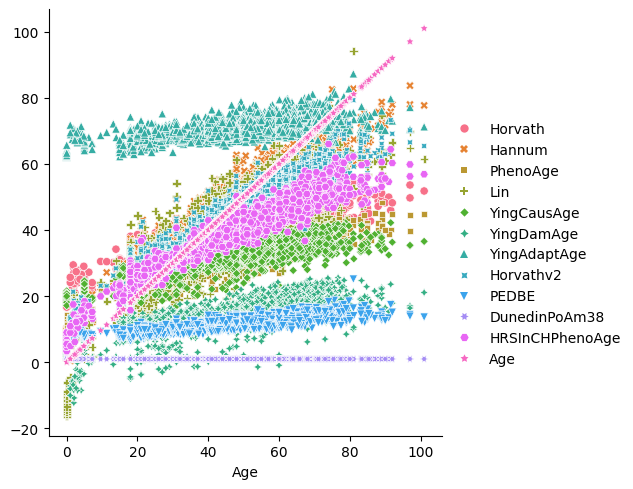

In [7]:
train_geo, test_geo = transform_to_biolearn_style(train_data, test_data)

data = test_geo
from biolearn.model_gallery import ModelGallery
gallery = ModelGallery()
#Note that by default clocks will impute missing data.
#To change this behavior set the imputation= parameter when getting the clock
horvath_results = gallery.get("Horvathv1").predict(data)
hannum_results = gallery.get("Hannum").predict(data)
phenoage_results = gallery.get("PhenoAge").predict(data)
Lin_results = gallery.get("Lin").predict(data)
YingCausAge_results = gallery.get("YingCausAge").predict(data)
YingDamAge_results = gallery.get("YingDamAge").predict(data)
YingAdaptAge_results = gallery.get("YingAdaptAge").predict(data)
Horvathv2_results = gallery.get("Horvathv2").predict(data)
HRSInCHPhenoAge_results = gallery.get("HRSInCHPhenoAge").predict(data)
DunedinPoAm38_results = gallery.get("DunedinPoAm38").predict(data)
PEDBE_results = gallery.get("PEDBE").predict(data)
import seaborn as sn
import pandas as pd

actual_age = data.metadata['age']
plot_data = pd.DataFrame({
    'Horvath': horvath_results['Predicted'],
    'Hannum': hannum_results['Predicted'],
    'PhenoAge': phenoage_results['Predicted'],
    'Lin': Lin_results['Predicted'],
    "YingCausAge":YingCausAge_results['Predicted'],
    "YingDamAge":YingDamAge_results['Predicted'],
    "YingAdaptAge":YingAdaptAge_results['Predicted'],
    "Horvathv2":Horvathv2_results['Predicted'],
    "PEDBE":PEDBE_results['Predicted'],
    #"DunedinPACE" :DunedinPACE_results['Predicted'],
    "DunedinPoAm38":DunedinPoAm38_results['Predicted'],
    'HRSInCHPhenoAge':HRSInCHPhenoAge_results['Predicted'],
    "Age": actual_age
})
plot_data.index=plot_data['Age']

sn.relplot(data=plot_data, kind="scatter");

import seaborn as sns
import pandas as pd
from sklearn.metrics import mean_absolute_error, median_absolute_error, mean_squared_error
import numpy as np

def calculate_errors(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    medae = median_absolute_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    return mae, medae, rmse

actual_age = data.metadata['age']
predictions = {
    'Horvath': horvath_results['Predicted'],
    'Hannum': hannum_results['Predicted'],
    'PhenoAge': phenoage_results['Predicted'],
    'Lin': Lin_results['Predicted'],
    'YingCausAge': YingCausAge_results['Predicted'],
    'YingDamAge': YingDamAge_results['Predicted'],
    'YingAdaptAge': YingAdaptAge_results['Predicted'],
    'Horvathv2': Horvathv2_results['Predicted'],
    'PEDBE': PEDBE_results['Predicted'],
    'DunedinPoAm38': DunedinPoAm38_results['Predicted'],
    'HRSInCHPhenoAge': HRSInCHPhenoAge_results['Predicted']
}

# Calculate error metrics for each prediction set
error_metrics = {}
for name, pred in predictions.items():
    mae, medae, rmse = calculate_errors(actual_age, pred)
    error_metrics[name] = {
        'MAE': mae,
        'MedAE': medae,
        'RMSE': rmse
    }




# Print error metrics
for name, metrics in error_metrics.items():
    print(f"{name} - MAE: {metrics['MAE']}, MedAE: {metrics['MedAE']}, RMSE: {metrics['RMSE']}")
error_metrics_df = pd.DataFrame(error_metrics).T
error_metrics_df =error_metrics_df.sort_values(by='MAE', ascending=True)
error_metrics_df

In [8]:
train_data, test_data = fold_data[4]

Horvath - MAE: 13.176981597631034, MedAE: 12.827436424305901, RMSE: 15.272426705797582
Hannum - MAE: 6.542264004225338, MedAE: 6.025360699999992, RMSE: 7.8410885988116625
PhenoAge - MAE: 15.801756139576867, MedAE: 13.900530260344489, RMSE: 18.904907900878133
Lin - MAE: 8.986103484838077, MedAE: 6.899657393799991, RMSE: 11.68743596585432
YingCausAge - MAE: 17.94645635195311, MedAE: 16.526727273668016, RMSE: 20.83511119942466
YingDamAge - MAE: 29.68473349730673, MedAE: 32.173065714575436, RMSE: 34.18081307604252
YingAdaptAge - MAE: 27.853384477469316, MedAE: 24.35900742064447, RMSE: 32.850892175895666
Horvathv2 - MAE: 6.928955143443069, MedAE: 6.68095750315216, RMSE: 8.33909818768585
PEDBE - MAE: 32.33936328832385, MedAE: 34.800354345742036, RMSE: 36.7531717791212
DunedinPoAm38 - MAE: 41.76371558089651, MedAE: 45.03949168781272, RMSE: 46.51213247589371
HRSInCHPhenoAge - MAE: 9.719655197376538, MedAE: 8.483252124593456, RMSE: 11.616761594566045


,MAE,MedAE,RMSE
Hannum,6.542264,6.025361,7.841089
Horvathv2,6.928955,6.680958,8.339098
Lin,8.986103,6.899657,11.687436
HRSInCHPhenoAge,9.719655,8.483252,11.616762
Horvath,13.176982,12.827436,15.272427
PhenoAge,15.801756,13.900530,18.904908
YingCausAge,17.946456,16.526727,20.835111
YingAdaptAge,27.853384,24.359007,32.850892
YingDamAge,29.684733,32.173066,34.180813
PEDBE,32.339363,34.800354,36.753172


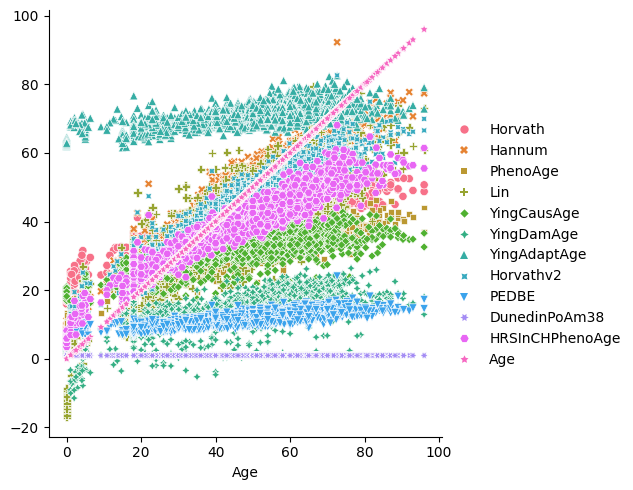

In [9]:
train_geo, test_geo = transform_to_biolearn_style(train_data, test_data)

data = test_geo
from biolearn.model_gallery import ModelGallery
gallery = ModelGallery()
#Note that by default clocks will impute missing data.
#To change this behavior set the imputation= parameter when getting the clock
horvath_results = gallery.get("Horvathv1").predict(data)
hannum_results = gallery.get("Hannum").predict(data)
phenoage_results = gallery.get("PhenoAge").predict(data)
Lin_results = gallery.get("Lin").predict(data)
YingCausAge_results = gallery.get("YingCausAge").predict(data)
YingDamAge_results = gallery.get("YingDamAge").predict(data)
YingAdaptAge_results = gallery.get("YingAdaptAge").predict(data)
Horvathv2_results = gallery.get("Horvathv2").predict(data)
HRSInCHPhenoAge_results = gallery.get("HRSInCHPhenoAge").predict(data)
DunedinPoAm38_results = gallery.get("DunedinPoAm38").predict(data)
PEDBE_results = gallery.get("PEDBE").predict(data)
import seaborn as sn
import pandas as pd

actual_age = data.metadata['age']
plot_data = pd.DataFrame({
    'Horvath': horvath_results['Predicted'],
    'Hannum': hannum_results['Predicted'],
    'PhenoAge': phenoage_results['Predicted'],
    'Lin': Lin_results['Predicted'],
    "YingCausAge":YingCausAge_results['Predicted'],
    "YingDamAge":YingDamAge_results['Predicted'],
    "YingAdaptAge":YingAdaptAge_results['Predicted'],
    "Horvathv2":Horvathv2_results['Predicted'],
    "PEDBE":PEDBE_results['Predicted'],
    #"DunedinPACE" :DunedinPACE_results['Predicted'],
    "DunedinPoAm38":DunedinPoAm38_results['Predicted'],
    'HRSInCHPhenoAge':HRSInCHPhenoAge_results['Predicted'],
    "Age": actual_age
})
plot_data.index=plot_data['Age']

sn.relplot(data=plot_data, kind="scatter");

import seaborn as sns
import pandas as pd
from sklearn.metrics import mean_absolute_error, median_absolute_error, mean_squared_error
import numpy as np

def calculate_errors(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    medae = median_absolute_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    return mae, medae, rmse

actual_age = data.metadata['age']
predictions = {
    'Horvath': horvath_results['Predicted'],
    'Hannum': hannum_results['Predicted'],
    'PhenoAge': phenoage_results['Predicted'],
    'Lin': Lin_results['Predicted'],
    'YingCausAge': YingCausAge_results['Predicted'],
    'YingDamAge': YingDamAge_results['Predicted'],
    'YingAdaptAge': YingAdaptAge_results['Predicted'],
    'Horvathv2': Horvathv2_results['Predicted'],
    'PEDBE': PEDBE_results['Predicted'],
    'DunedinPoAm38': DunedinPoAm38_results['Predicted'],
    'HRSInCHPhenoAge': HRSInCHPhenoAge_results['Predicted']
}

# Calculate error metrics for each prediction set
error_metrics = {}
for name, pred in predictions.items():
    mae, medae, rmse = calculate_errors(actual_age, pred)
    error_metrics[name] = {
        'MAE': mae,
        'MedAE': medae,
        'RMSE': rmse
    }




# Print error metrics
for name, metrics in error_metrics.items():
    print(f"{name} - MAE: {metrics['MAE']}, MedAE: {metrics['MedAE']}, RMSE: {metrics['RMSE']}")
error_metrics_df = pd.DataFrame(error_metrics).T
error_metrics_df =error_metrics_df.sort_values(by='MAE', ascending=True)
error_metrics_df